In [ ]:
# Graph_objects
# Dict
# Plotly_express

In [1]:
# 1 
import plotly.graph_objects as go

In [2]:
x = [1,2,3]
y = [1,3,2]

In [8]:
fig = go.Figure(
    go.Bar(x=x,y=y)
)
fig.show()

In [ ]:
# 2.


In [9]:
fig = {
    "data" : [
        {
            "type" : "bar",
             "x" : x ,
             "y" : y
        }
    ]
}

In [10]:
import plotly.io as pio

In [11]:
pio.show(fig)

In [12]:
# 3

In [13]:
import plotly.express as plx

In [15]:
import pandas as pd

In [16]:
data = {
    'x' : x,
    'y' : y
}
df=pd.DataFrame(data)

In [19]:
fig = plx.bar(df , x='x' , y='y')
fig.show()

# Folium 

In [39]:
import pandas
import random

n = 319000 #number of records in file
s = 30000 #desired sample size
listIndex = list(range(n))
skip_row = sorted(random.sample(listIndex,(n-s)))
filename = "crime.csv"
skip_row = skip_row[1:]
# skip = sorted(random.sample(range(n),n-s))
# skip
df = pandas.read_csv(filename, skiprows=skip_row,encoding='latin')

In [40]:
df.shape

(30074, 17)

In [41]:
df.head()

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I182070945           619             Larceny   
1      I182070920          3006  Medical Assistance   
2      I182070903          2900               Other   
3      I182070888           301             Robbery   
4      I182070873          3625               Other   

                   OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0                   LARCENY ALL OTHERS      D14            808      NaN   
1        SICK/INJURED/MEDICAL - PERSON      NaN                     NaN   
2  VAL - VIOLATION OF AUTO LAW - OTHER       B3            463      NaN   
3                     ROBBERY - STREET       A1             76      NaN   
4     DANGEROUS OR HAZARDOUS CONDITION       B2            327      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-09-02 13:00:00  2018      9      Sunday    13    Part One   
1  2018-09-03 19:43:00  2018      9      Monday    19  Part Three   
2  2018-09-03 18:55:00  2018      9      Monday    18    Part Two   
3  2018-09-03 15:45:00  2018      9      Monday    15    Part One   
4  2018-09-03 15:38:00  2018      9      Monday    15  Part Three   

          STREET        Lat       Long                     Location  
0     LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)  
1            NaN  42.352875 -71.073830  (42.35287456, -71.07382970)  
2  BLUE HILL AVE  42.295904 -71.087733  (42.29590385, -71.08773294)  
3            NaN        NaN        NaN     (0.00000000, 0.00000000)  
4     WAYLAND ST  42.313689 -71.074271  (42.31368925, -71.07427080)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30074 entries, 0 to 30073
Data columns (total 17 columns):
INCIDENT_NUMBER        30074 non-null object
OFFENSE_CODE           30074 non-null int64
OFFENSE_CODE_GROUP     30074 non-null object
OFFENSE_DESCRIPTION    30074 non-null object
DISTRICT               29906 non-null object
REPORTING_AREA         30074 non-null object
SHOOTING               90 non-null object
OCCURRED_ON_DATE       30074 non-null object
YEAR                   30074 non-null int64
MONTH                  30074 non-null int64
DAY_OF_WEEK            30074 non-null object
HOUR                   30074 non-null int64
UCR_PART               30066 non-null object
STREET                 29004 non-null object
Lat                    28141 non-null float64
Long                   28141 non-null float64
Location               30074 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 3.9+ MB


In [43]:
df.nunique()

INCIDENT_NUMBER        29618
OFFENSE_CODE             193
OFFENSE_CODE_GROUP        66
OFFENSE_DESCRIPTION      201
DISTRICT                  12
REPORTING_AREA           868
SHOOTING                   1
OCCURRED_ON_DATE       28828
YEAR                       4
MONTH                     12
DAY_OF_WEEK                7
HOUR                      24
UCR_PART                   4
STREET                  2780
Lat                     9078
Long                    9077
Location                9083
dtype: int64

In [45]:
df.SHOOTING.unique()

array([nan, 'Y'], dtype=object)

In [47]:
df.SHOOTING.fillna('N',inplace=True)

In [50]:
df.dropna(inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27899 entries, 0 to 30073
Data columns (total 17 columns):
INCIDENT_NUMBER        27899 non-null object
OFFENSE_CODE           27899 non-null int64
OFFENSE_CODE_GROUP     27899 non-null object
OFFENSE_DESCRIPTION    27899 non-null object
DISTRICT               27899 non-null object
REPORTING_AREA         27899 non-null object
SHOOTING               27899 non-null object
OCCURRED_ON_DATE       27899 non-null object
YEAR                   27899 non-null int64
MONTH                  27899 non-null int64
DAY_OF_WEEK            27899 non-null object
HOUR                   27899 non-null int64
UCR_PART               27899 non-null object
STREET                 27899 non-null object
Lat                    27899 non-null float64
Long                   27899 non-null float64
Location               27899 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 3.8+ MB


In [52]:
import seaborn as sns

In [62]:
id_to_drop = df[df['Long'] == -1].index

In [64]:
df = df.drop(id_to_drop,axis=0)

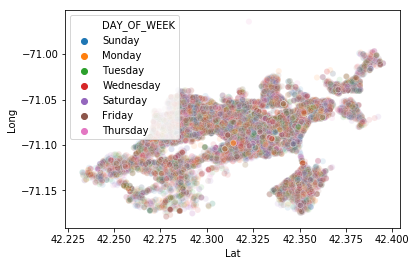

In [70]:

sns.scatterplot(data=df, x = 'Lat' , y = 'Long' ,alpha=0.1 , hue='DAY_OF_WEEK')

In [72]:
df.DAY_OF_WEEK.value_counts()

Friday       4203
Thursday     4116
Tuesday      4089
Wednesday    4072
Monday       3961
Saturday     3938
Sunday       3505
Name: DAY_OF_WEEK, dtype: int64

In [71]:
import folium

In [96]:
map_crime = folium.Map(
    location = [42.357791,-71.139371],
#     zoom_start = 5,
    tiles='OpenStreetMap'  # 'Stamen Terrain', 'Stamen Toner', 'Mapbox Bright', 'Mapbox Control Room'
)
folium.Marker(
    [42.357791,-71.139371],
    popup = 'Ini Titik Pertama',
    icon = folium.Icon(color='black' , icon='home' , prefix='fa')
).add_to(map_crime)

map_crime

In [100]:
# Multiple Markers
list_lat_long = []

In [101]:
for index,value in df.iterrows():
    temp = [value['Lat'] , value['Long']]
    list_lat_long.append(temp)

In [106]:
df.iloc[2]

INCIDENT_NUMBER                              I182070873
OFFENSE_CODE                                       3625
OFFENSE_CODE_GROUP                                Other
OFFENSE_DESCRIPTION    DANGEROUS OR HAZARDOUS CONDITION
DISTRICT                                             B2
REPORTING_AREA                                      327
SHOOTING                                              N
OCCURRED_ON_DATE                    2018-09-03 15:38:00
YEAR                                               2018
MONTH                                                 9
DAY_OF_WEEK                                      Monday
HOUR                                                 15
UCR_PART                                     Part Three
STREET                                       WAYLAND ST
Lat                                             42.3137
Long                                           -71.0743
Location                    (42.31368925, -71.07427080)
Name: 4, dtype: object

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I182070945           619             Larceny   
2      I182070903          2900               Other   
4      I182070873          3625               Other   
5      I182070859          3006  Medical Assistance   
6      I182070849          1849      Drug Violation   

                    OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0                    LARCENY ALL OTHERS      D14            808        N   
2   VAL - VIOLATION OF AUTO LAW - OTHER       B3            463        N   
4      DANGEROUS OR HAZARDOUS CONDITION       B2            327        N   
5         SICK/INJURED/MEDICAL - PERSON       B2            305        N   
6  DRUGS - POSS CLASS B - COCAINE, ETC.       C6            177        N   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-09-02 13:00:00  2018      9      Sunday    13    Part One   
2  2018-09-03 18:55:00  2018      9      Monday    18    Part Two   
4  2018-09-03 15:38:00  2018      9      Monday    15  Part Three   
5  2018-09-03 15:46:00  2018      9      Monday    15  Part Three   
6  2018-09-03 11:30:00  2018      9      Monday    11    Part Two   

              STREET        Lat       Long                     Location  
0         LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)  
2      BLUE HILL AVE  42.295904 -71.087733  (42.29590385, -71.08773294)  
4         WAYLAND ST  42.313689 -71.074271  (42.31368925, -71.07427080)  
5      KENSINGTON ST  42.320627 -71.091089  (42.32062680, -71.09108856)  
6  MASSACHUSETTS AVE  42.331521 -71.070853  (42.33152148, -71.07085307)

In [113]:
map_crime = folium.Map(
    location = [42.357791,-71.139371],
#     zoom_start = 5,
    tiles='OpenStreetMap'  # 'Stamen Terrain', 'Stamen Toner', 'Mapbox Bright', 'Mapbox Control Room'
)

for i in range(100):    
    folium.Marker(
        list_lat_long[i],
        popup = '<b>'+ df.iloc[i].OFFENSE_CODE_GROUP
        + '</b>'+ '<hr></hr>' + df.iloc[i].DAY_OF_WEEK,
        icon = folium.Icon(color='black' , icon='home' , prefix='fa')
    ).add_to(map_crime)

# Extra 
map_crime.add_child(folium.LatLngPopup())
map_crime.add_child(folium.ClickForMarker(popup='bclick'))
map_crime

In [114]:
from folium.plugins import HeatMap

In [122]:
map_crime = folium.Map(
    location = [42.357791,-71.139371],
#     zoom_start = 5,
    tiles='OpenStreetMap'  # 'Stamen Terrain', 'Stamen Toner', 'Mapbox Bright', 'Mapbox Control Room'
)

HeatMap(data=list_lat_long , radius=10,opacity=0.1).add_to(map_crime)
map_crime

In [123]:

quakes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv')

In [126]:
quakes[quakes.Magnitude == 9.1]

Date  Latitude  Longitude  Magnitude
17083  12/26/2004     3.295     95.982        9.1
20501  03/11/2011    38.297    142.373        9.1

In [133]:
fig = go.Figure(
    go.Densitymapbox(
        lat=quakes.Latitude, lon=quakes.Longitude,z=quakes.Magnitude, radius=10
    )
)
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=95.982)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})